In [1]:
# Things to Try
# Cross Validation for tetsing models 
# PCA 
# Initial Cluster Analysis 
# Improve visuals with seaborn 
# Break data by type of tree first
    # classify three types then further down( Build own tree)
    

In [62]:
import numpy as np
import pandas as pd
import sys
import os.path
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor


from IPython.display import Image  
from sklearn import tree
import pydotplus

## EDA Analysis

#### Load data

In [3]:
file_path = os.getcwd() + "/data"
trian_df = pd.read_csv(file_path + '/train.csv')
# print trian_df.head()
test_df = pd.read_csv(file_path + '/test.csv')
# print test_df.head()

In [4]:
target = trian_df['Cover_Type']
trian_df = trian_df.drop('Cover_Type', 1)

In [5]:
target_names_list = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", 
                "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]
target_names_dict = {1:"Spruce/Fir",2:"Lodgepole Pine",3:"Ponderosa Pine", 
                4:"Cottonwood/Willow",5:"Aspen", 6:"Douglas-fir", 7:"Krummholz"}

counts = target.value_counts(sort=False)
total = sum(counts)
print "Class Distribution in Target Var: "
print "\tClass                    |  Number of Examples"
for c in np.unique(target):
    print "\t%i, %-17s     |   %i (%0.2f)" %(c, target_names_dict[c] ,counts[c], (counts[c]/float(total))*100)


Class Distribution in Tagret Var: 
	Class                    |  Number of Examples
	1, Spruce/Fir            |   2160 (14.29)
	2, Lodgepole Pine        |   2160 (14.29)
	3, Ponderosa Pine        |   2160 (14.29)
	4, Cottonwood/Willow     |   2160 (14.29)
	5, Aspen                 |   2160 (14.29)
	6, Douglas-fir           |   2160 (14.29)
	7, Krummholz             |   2160 (14.29)


In [6]:
# Split into Train, Dev, Test Sets 
l = len(target)
X_train, X_dev, y_train, y_dev = train_test_split(trian_df, target, test_size=0.30, random_state=42)
print "Train data size %i X %i" % (X_train.shape[0], X_train.shape[1])
print "Test data size %i X %i" % (X_dev.shape[0], X_dev.shape[1])

Train data size 10130 X 55
Test data size 4990 X 55


In [7]:
# Dirstribution of true classes
counts = y_train.value_counts(sort=False)
total = sum(counts)
print "Class Distribution in Train: "
print "\tClass                    |  Number of Examples"
for c in np.unique(y_train):
    print "\t%i, %-17s     |   %i (%0.2f)" %(c, target_names_dict[c] ,counts[c], (counts[c]/float(total))*100)


counts = y_dev.value_counts(sort=False)
total = sum(counts)
print "\nClass Distribution in Development: "
print "\tClass                    |  Number of Examples"
for c in np.unique(y_dev):
    print "\t%i, %-17s     |   %i (%0.2f)" %(c, target_names_dict[c] ,counts[c], (counts[c]/float(total))*100)
    

    

Class Distribution in Train: 
	Class                    |  Number of Examples
	1, Spruce/Fir            |   1481 (14.62)
	2, Lodgepole Pine        |   1438 (14.20)
	3, Ponderosa Pine        |   1456 (14.37)
	4, Cottonwood/Willow     |   1421 (14.03)
	5, Aspen                 |   1439 (14.21)
	6, Douglas-fir           |   1438 (14.20)
	7, Krummholz             |   1457 (14.38)

Class Distribution in Development: 
	Class                    |  Number of Examples
	1, Spruce/Fir            |   679 (13.61)
	2, Lodgepole Pine        |   722 (14.47)
	3, Ponderosa Pine        |   704 (14.11)
	4, Cottonwood/Willow     |   739 (14.81)
	5, Aspen                 |   721 (14.45)
	6, Douglas-fir           |   722 (14.47)
	7, Krummholz             |   703 (14.09)


In [8]:
# Features Information
print "About the Data"
print "Shape of Data: %i X %i" %(X_train.shape[0], X_train.shape[1])
# print "Column Names" 
# print list(X_train.columns)

# Print type of featuers and NaN Values 
dtype_dict = {'b': 'boolean', 'i': 'signed integer', 'u':'unsigned integer', 'f': 'floating-point',
              'c':'complex floating-point', 'm': 'timedelta', 'M': 'datetime','O':'object',
              'S':'(byte-)string', 'U':'Unicode','V':'void'}

print "\nFetaures in Dataset" 
print "Num   | Fetaure Name                       |  Data Type          |  Null Values "
c = 1
for feat in X_train.columns:
    print " %-3i  | %-35s|  %15s    |  %i  " % (c, feat, dtype_dict[X_train[feat].dtype.kind], X_train[feat].isnull().sum())
    c = c+1


About the Data
Shape of Data: 10130 X 55

Fetaures in Dataset
Num   | Fetaure Name                       |  Data Type          |  Null Values 
 1    | Id                                 |   signed integer    |  0  
 2    | Elevation                          |   signed integer    |  0  
 3    | Aspect                             |   signed integer    |  0  
 4    | Slope                              |   signed integer    |  0  
 5    | Horizontal_Distance_To_Hydrology   |   signed integer    |  0  
 6    | Vertical_Distance_To_Hydrology     |   signed integer    |  0  
 7    | Horizontal_Distance_To_Roadways    |   signed integer    |  0  
 8    | Hillshade_9am                      |   signed integer    |  0  
 9    | Hillshade_Noon                     |   signed integer    |  0  
 10   | Hillshade_3pm                      |   signed integer    |  0  
 11   | Horizontal_Distance_To_Fire_Points |   signed integer    |  0  
 12   | Wilderness_Area1                   |   signed integer    

## Null Models

In [68]:
# Predict one type for all
preds = np.ones(len(X_dev))

# Print Classification Summary Scored in Development 
print "Accuracy Score for Null Model 1 (predic single value): %0.2f%%\n" % (np.mean(preds == y_dev))

print metrics.classification_report(y_dev, preds,
                                    target_names = target_names_list)

Accuracy Score for Null Model 1 (predic single value): 0.14%

                   precision    recall  f1-score   support

       Spruce/Fir       0.14      1.00      0.24       679
   Lodgepole Pine       0.00      0.00      0.00       722
   Ponderosa Pine       0.00      0.00      0.00       704
Cottonwood/Willow       0.00      0.00      0.00       739
            Aspen       0.00      0.00      0.00       721
      Douglas-fir       0.00      0.00      0.00       722
        Krummholz       0.00      0.00      0.00       703

      avg / total       0.02      0.14      0.03      4990



/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
# Predict a random possibility for all 
preds = np.random.randint(np.min(np.unique(y_dev)), np.max(np.unique(y_dev)), size=len(y_dev))

# Print Classification Summary Scored in Development 
print "Accuracy Score for Null Model 1 (predic single value): %0.2f%%\n" % (np.mean(preds == y_dev))

print metrics.classification_report(y_dev, preds,
                                    target_names = target_names_list)

Accuracy Score for Null Model 1 (predic single value): 0.15%

                   precision    recall  f1-score   support

       Spruce/Fir       0.13      0.15      0.14       679
   Lodgepole Pine       0.14      0.17      0.16       722
   Ponderosa Pine       0.16      0.18      0.17       704
Cottonwood/Willow       0.15      0.17      0.16       739
            Aspen       0.15      0.18      0.17       721
      Douglas-fir       0.15      0.17      0.16       722
        Krummholz       0.00      0.00      0.00       703

      avg / total       0.13      0.15      0.14      4990



### Try Different Modeling Types 

In [49]:
def fit_model(model_name, search_grid, score, train_df, train_labels, cv):
    param_searcher = GridSearchCV(model_name(), search_grid, cv=cv, scoring=score)
    param_searcher.fit(train_df, train_labels)
    return param_searcher

In [50]:
# Defining function to plot grid scores
def plot_grid_scores(x,y,x_label,y_label,title, best_x, best_y):
    plt.plot(x, y, '.')
    plt.plot(best_x, best_y, 'm*', ms=10)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    return plt

TODO: 
* For KNN Add visual of clusters if the results are good enough
* Try Higher K

In [11]:
# Quick KNN Model
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print "KNN test Score: %0.2f%%" % knn.score(X_dev,y_dev)
preds = knn.predict(X_dev)
print "Confusion Matrix"
confusion_matrix(y_dev, preds)

KNN test Score: 0.78%
Confusion Matrix


array([[428, 115,   4,   0,  40,   4,  88],
       [133, 389,  37,   0, 114,  26,  23],
       [  0,   5, 488,  90,  15, 106,   0],
       [  0,   0,  28, 696,   0,  15,   0],
       [  0,  22,  22,   0, 672,   5,   0],
       [  0,   8,  80,  51,   9, 574,   0],
       [ 32,   2,   0,   0,   0,   0, 669]])

In [12]:
# Set Parameters for all Models
cv = 100
score = 'f1_weighted' # can try different scores 

## KNearestNeigbors

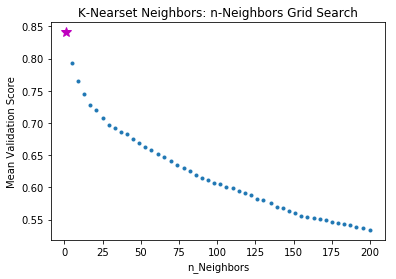

Accuracy Score on Dev Set with Best Params Neighbors = 1, 0.85%
                   precision    recall  f1-score   support

       Spruce/Fir       0.77      0.72      0.74       679
   Lodgepole Pine       0.76      0.66      0.71       722
   Ponderosa Pine       0.85      0.81      0.82       704
Cottonwood/Willow       0.89      0.95      0.92       739
            Aspen       0.88      0.96      0.92       721
      Douglas-fir       0.85      0.88      0.86       722
        Krummholz       0.92      0.97      0.94       703

      avg / total       0.85      0.85      0.85      4990



In [13]:
# Grid Search KNN 
# Parameters to search
# 'algorithm': ["auto", "ball_tree", "kd_tree", "brute"]
search_grid = {'n_neighbors': np.linspace(1, 200, 50, endpoint=True, dtype = int)}
# search_grid = {'n_neighbors': np.linspace(1, 1000, 2, endpoint=True, dtype = int)}
# np.linspace(1, 500, 100, endpoint=True, dtype = int)

knn_gs = fit_model(KNeighborsClassifier, search_grid, score, X_train, y_train, cv)
grid_scores = pd.DataFrame(knn_gs.grid_scores_)
neighbors = []
for i in range(len(grid_scores['parameters'])):
    neighbors.append(grid_scores['parameters'][i]['n_neighbors'])

# Visualize Scores for each Search
plot_grid_scores(neighbors,grid_scores['mean_validation_score'], "n_Neighbors", "Mean Validation Score",
                 "K-Nearset Neighbors: n-Neighbors Grid Search", 
                 knn_gs.best_params_.get('n_neighbors'), knn_gs.best_score_)

# Fit best model from Grid Search
knn = KNeighborsClassifier(n_neighbors = knn_gs.best_params_.get('n_neighbors'))
knn.fit(X_train, y_train)

# Print Classification Summary Scored in Development 
print "Accuracy Score on Dev Set with Best Params Neighbors = %i, %0.2f%%" % ( knn_gs.best_params_.get('n_neighbors'),
                                                      knn.score(X_dev,y_dev))
preds = knn.predict(X_dev)
print metrics.classification_report(y_dev, preds, target_names = target_names_list)


In [ ]:
# Visualize reuslts 
# Scatter with jitter or clusters 


## Logistic Regression

TODO: 
* ROC curve / AUC Score 
* Polynomial Feature Search 
* RidgeCV, LassoCV, Elastic Net
* Check coefficients to see if regularization is needed (Week 5) 



In [14]:
# Quick Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train, y_train)
print "Logistic Regression test Score: %0.2f%%" % lr.score(X_dev, y_dev)
preds = lr.predict(X_dev)
print "Confusion Matrix"
confusion_matrix(y_dev, preds)

Logistic Regression test Score: 0.65%
Confusion Matrix


array([[366, 138,   4,   0,  53,   3, 115],
       [162, 343,  29,   2, 148,  23,  15],
       [  0,   3, 352, 126,  32, 190,   1],
       [  0,   0,  45, 662,   0,  32,   0],
       [ 20, 116,  59,   0, 495,  31,   0],
       [  0,  19, 130,  90,  83, 400,   0],
       [ 48,   4,   2,   0,   3,   0, 646]])

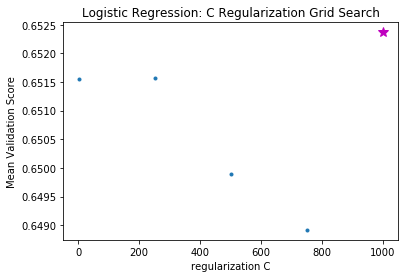

Accuracy Score on Dev Set with Best Params: C = 1000, 0.65%
                   precision    recall  f1-score   support

       Spruce/Fir       0.61      0.59      0.60       679
   Lodgepole Pine       0.53      0.49      0.51       722
   Ponderosa Pine       0.57      0.48      0.52       704
Cottonwood/Willow       0.75      0.89      0.82       739
            Aspen       0.61      0.64      0.62       721
      Douglas-fir       0.59      0.57      0.58       722
        Krummholz       0.85      0.90      0.87       703

      avg / total       0.65      0.65      0.65      4990



In [16]:
# Grid Search Logistic Regression

# Adjust tol (tolenrance if needed)
# multi_class : str, {‘ovr’, ‘multinomial’},
# solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’} (might need max_iter)

# regularization_Cs = {'C': np.linspace(1, 100, 2, endpoint=True)} # 'penalty': ['l1','l2']
regularization_Cs = {'C': np.linspace(1, 3000, 5, endpoint=True)} # 'penalty': ['l1', 'l2']

# Model
lr_gs = fit_model(LogisticRegression, regularization_Cs, score, X_train, y_train, cv)
grid_scores = pd.DataFrame(lr_gs.grid_scores_)
C_s = []
for i in range(len(grid_scores['parameters'])):
    C_s.append(grid_scores['parameters'][i]['C'])

# Visualize Scores for each Search
plot_grid_scores(C_s,grid_scores['mean_validation_score'], "regularization C", 
                 "Mean Validation Score","Logistic Regression: C Regularization Grid Search", 
                 lr_gs.best_params_.get('C'), lr_gs.best_score_)

# Fit best model from Grid Search
lr = LogisticRegression(C = lr_gs.best_params_.get('C'))
lr.fit(X_train, y_train)

# Print Classification Summary Scored in Development 
print "Accuracy Score on Dev Set with Best Params: C = %i, %0.2f%%" % ( lr_gs.best_params_.get('C'), 
                                                                              lr.score(X_dev,y_dev))

preds = lr.predict(X_dev)
print metrics.classification_report(y_dev, preds,
                                    target_names = target_names_list)

## Naive Bayes

### GuassianNB

In [17]:
# Fit GuassianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Print Classification Summary Scored in Development 
print "Accuracy Score on Dev Set %0.2f%%\n" % (gnb.score(X_dev,y_dev))
preds = gnb.predict(X_dev)
print metrics.classification_report(y_dev, preds,
                                    target_names = target_names_list)


Accuracy Score on Dev Set 0.65%

                   precision    recall  f1-score   support

       Spruce/Fir       0.56      0.67      0.61       679
   Lodgepole Pine       0.61      0.40      0.48       722
   Ponderosa Pine       0.52      0.61      0.56       704
Cottonwood/Willow       0.71      0.93      0.80       739
            Aspen       0.65      0.72      0.69       721
      Douglas-fir       0.69      0.39      0.49       722
        Krummholz       0.87      0.86      0.86       703

      avg / total       0.66      0.65      0.64      4990



### BernoulliNB

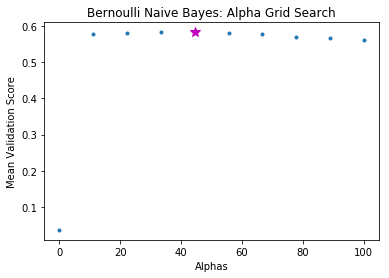

Accuracy Score on Dev Set with Best Params Alpha = 44, 0.59%

                   precision    recall  f1-score   support

       Spruce/Fir       0.53      0.39      0.45       679
   Lodgepole Pine       0.47      0.47      0.47       722
   Ponderosa Pine       0.51      0.46      0.49       704
Cottonwood/Willow       0.80      0.85      0.82       739
            Aspen       0.46      0.65      0.54       721
      Douglas-fir       0.55      0.50      0.52       722
        Krummholz       0.86      0.82      0.84       703

      avg / total       0.60      0.59      0.59      4990



In [19]:
# Partial fit if need be
alphas = {'alpha': np.linspace(0, 100, 1000, endpoint=True)}
alphas = {'alpha': np.linspace(0, 100, 10, endpoint=True)}

# Model 
bnb_gs = fit_model(BernoulliNB, alphas, score, X_train, y_train, cv)
grid_scores = pd.DataFrame(bnb_gs.grid_scores_)
alphas_search = []
for i in range(len(grid_scores['parameters'])):
    alphas_search.append(grid_scores['parameters'][i]['alpha'])

# Visualize Scores for each Search
plot_grid_scores(alphas_search,grid_scores['mean_validation_score'], "Alphas", 
                 "Mean Validation Score", "Bernoulli Naive Bayes: Alpha Grid Search", 
                 bnb_gs.best_params_.get('alpha'), bnb_gs.best_score_)

# Fit best model from Grid Search
bnb = BernoulliNB(alpha = bnb_gs.best_params_.get('alpha'))
bnb.fit(X_train, y_train)

# Print Classification Summary Scored in Development 
print "Accuracy Score on Dev Set with Best Params Alpha = %i, %0.2f%%\n" % (bnb_gs.best_params_.get('alpha'), 
                                                                              bnb.score(X_dev,y_dev))

preds = bnb.predict(X_dev)
print metrics.classification_report(y_dev, preds,
                                    target_names = target_names_list)




## MultinomialNB

In [ ]:
# Need to make all data positive
# Square or take Square root of data 
# Bin Data?
# Find Best option for 

In [42]:
# Partial fit if need be
alphas = {'alpha': np.linspace(0, 100, 1000, endpoint=True)}
alphas = {'alpha': np.linspace(0, 100, 10, endpoint=True)}

X_train_pow = X_train.apply(np.sqrt, axis = 0)
X_dev_pow = X_dev.apply(np.sqrt, axis = 0)

# Model
mnb_gs = fit_model(MultinomialNB, alphas, score, X_train_pow, y_train, cv)
grid_scores = pd.DataFrame(mnb_gs.grid_scores_)
alphas_search = []
for i in range(len(grid_scores['parameters'])):
    alphas_search.append(grid_scores['parameters'][i]['alpha'])

# Visualize Scores for each Search
plot_grid_scores(alphas_search,grid_scores['mean_validation_score'], "Alphas", 
                 "Mean Validation Score", "Bernoulli Naive Bayes: Alpha Grid Search", 
                 mnb_gs.best_params_.get('alpha'), mnb_gs.best_score_)

# Fit best model from Grid Search
mnb = MultinomialNB(alpha = mnb_gs.best_params_.get('alpha'))
mnb.fit(X_train_pow, y_train)

# Print Classification Summary Scored in Development 
print "Accuracy Score on Dev Set with Best Params: Alpha = %i, %0.2f%%" % (mnb_gs.best_params_.get('alpha'), 
                                                                              mnb.score(X_dev_pow,y_dev))

preds = mnb.predict(X_dev)
print metrics.classification_report(y_dev, preds,
                                    target_names = target_names_list)



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Decision Tree

In [63]:
# Simple/Quick Dtree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_dev, y_dev)

0.49738796101331628

In [66]:
dot_data = tree.export_graphviz(dt, out_file='tmp.dot',
                                feature_names=X_train.columns,  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = pydotplus.graphviz.graph_from_dot_file('tmp.dot')
graph.show()
# Image(graph.create_png())  

AttributeError: 'Dot' object has no attribute 'show'

In [ ]:
# criterion, splitter, max_depth, min_samples_split, min_samples_leaf, max_features, max_leaf_nodes



# Model
dt_gs = fit_model(DecisionTreeRegressor, params, score, X_train, y_train, cv)
grid_scores = pd.DataFrame(dt_gs.grid_scores_)
alphas_search = []
for i in range(len(grid_scores['parameters'])):
    alphas_search.append(grid_scores['parameters'][i]['alpha'])


In [ ]:
# Create Predictions from Test Set 
test_preds = knn.predict(test_df)
submission_df = pd.DataFrame(data= {'Id': test_df['Id'], 'Cover_Type': test_preds})
submission_df.to_csv(file_path + '/submission.csv')